In [1]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="darkgrid")
pd.set_option('display.max_rows', None)

In [2]:
def calculate_pct_diff(row):
    pct_diff = []
    for i in range(len(row) - 1):
        # Check for non-missing values and non-zero denominator
        if pd.notna(row.iloc[i+1]) and pd.notna(row.iloc[i]) and row.iloc[i+1] != 0:
            diff = ((row.iloc[i] - row.iloc[i+1]) / row.iloc[i+1]) * 100
            pct_diff.append(diff)
        else:
            pct_diff.append(np.nan)  # Append NaN if denominator is zero or values are missing
    return pct_diff

In [3]:
ticker = "SAN"

 # 1. Stock Information

In [4]:
stock = yahooFinance.Ticker(ticker)

In [5]:
stock_info = stock.info
stock_info

{'address1': 'Santander Group City',
 'address2': 'Av. de Cantabria s/n Boadilla del Monte',
 'city': 'Madrid',
 'zip': '28660',
 'country': 'Spain',
 'phone': '34 912 596520',
 'website': 'https://www.santander.com',
 'industry': 'Banks - Diversified',
 'industryKey': 'banks-diversified',
 'industryDisp': 'Banks - Diversified',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Banco Santander, S.A. provides various financial products and services to individuals, small and medium-sized enterprises, large corporations, and public entities worldwide. The company operates through five segments: Retail & Commercial Banking, Digital Consumer Bank, Corporate & Investment Banking, Wealth Management & Insurance, and Payments. It offers demand and time deposits, mutual funds, and current and savings accounts; mortgages, consumer finance, loans, and various financing solutions; and project finance, debt capital mark

In [6]:
market_cap = stock_info['marketCap']
market_cap

139356258304

In [7]:
exchange = stock_info['exchange']
exchange

'NYQ'

In [8]:
averageVolume = stock_info['averageVolume']
averageVolume

5889255

In [9]:
averageVolume10days = stock_info['averageVolume10days']
averageVolume10days

3109210

In [10]:
currentPrice = stock_info['currentPrice']
currentPrice

9.37

In [11]:
fiftyDayAverage_stockPrice = stock_info['fiftyDayAverage']
fiftyDayAverage_stockPrice

8.7872

In [12]:
twoHundredDayAverage_StockPrice = stock_info['twoHundredDayAverage']
twoHundredDayAverage_StockPrice

6.76265

In [13]:
try:
  trailingPE = stock_info['trailingPE']
  print(trailingPE)
except Exception:
  print("An exception occurred") 

9.863158


In [14]:
try:
  forwardPE = stock_info['forwardPE']
  print(forwardPE)
except Exception:
  print("An exception occurred") 

11.860759


In [15]:
priceToBook = stock_info['priceToBook']
priceToBook

1.4136995

In [16]:
try:
  currentRatio = stock_info['currentRatio']
  print(currentRatio)
except Exception:
  print("An exception occurred") 

An exception occurred


In [17]:
trailingEps = stock_info['trailingEps']
trailingEps

0.95

In [18]:
forwardEps = stock_info['forwardEps']
forwardEps

0.79

In [19]:
try:
  earningsGrowth = stock_info['earningsGrowth']
  print(earningsGrowth)
except Exception:
  print("An exception occurred") 

0.158


In [20]:
try:
  beta = stock_info['beta']
  print(beta)
except Exception:
  print("An exception occurred")

1.297


In [21]:
try:
  recommendationKey = stock_info['recommendationKey']
  print(recommendationKey)
except Exception:
  print("An exception occurred") 

none


In [22]:
try:
  shareHolderRightsRisk = stock_info['shareHolderRightsRisk']
  print(shareHolderRightsRisk)
except Exception:
  print("An exception occurred") 

An exception occurred


<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

 # 2. Holders

In [23]:
try:
  print(stock.major_holders)
except Exception:
  print("An exception occurred") 

Breakdown                         Value
insidersPercentHeld             0.00003
institutionsPercentHeld         0.02843
institutionsFloatPercentHeld    0.02843
institutionsCount             541.00000


In [24]:
try:
  print(stock.institutional_holders)
except Exception:
  print("An exception occurred") 

  Date Reported                                    Holder  pctHeld     Shares  \
0    2025-06-30              Fisher Asset Management, LLC   0.0079  117592077   
1    2025-03-31          Mondrian Investment Partners Ltd   0.0026   38115296   
2    2025-06-30                                  FMR, LLC   0.0021   31336997   
3    2025-06-30                            Morgan Stanley   0.0020   30174478   
4    2025-06-30                   Goldman Sachs Group Inc   0.0012   17534507   
5    2025-06-30          Chevy Chase Trust Holdings, Inc.   0.0010   14482986   
6    2025-06-30  Arrowstreet Capital, Limited Partnership   0.0010   14315834   
7    2025-06-30                            Blackrock Inc.   0.0008   12462179   
8    2025-06-30                Northern Trust Corporation   0.0008   11843218   
9    2025-06-30              Dimensional Fund Advisors LP   0.0007   10907717   

        Value  pctChange  
0  1101837748    -0.0838  
1   357140319    -0.1239  
2   293627658     0.2352  


In [25]:
try:
  print(stock.mutualfund_holders)
except:
  print("An exception occurred") 

  Date Reported                                             Holder  pctHeld  \
0    2025-06-30           iShares Trust-iShares Core MSCI EAFE ETF   0.0065   
1    2025-06-30                iShares Trust-iShares MSCI EAFE ETF   0.0035   
2    2025-06-30               iShares, Inc.-iShares MSCI Spain ETF   0.0019   
3    2025-06-30          iShares Trust-iShares MSCI EAFE Value ETF   0.0018   
4    2025-06-30   iShares Trust-iShares MSCI Europe Financials ETF   0.0014   
5    2025-06-30  iShares Trust-iShares Core MSCI Total Internat...   0.0013   
6    2025-06-30            iShares, Inc.-iShares MSCI Eurozone ETF   0.0012   
7    2025-06-30  iShares Trust-iShares Core MSCI International ...   0.0008   
8    2025-06-30  John Hancock Investment TRT-John Hancock Disci...   0.0007   
9    2025-06-30      iShares Trust-iShares ESG Aware MSCI EAFE ETF   0.0006   

     Shares      Value  pctChange  
0  97466063  913256999     0.0007  
1  51492619  482485834    -0.0010  
2  28173401  263984764

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 3. Actions - Dividends & Stock Splits

In [26]:
stock.actions

,Dividends,Stock Splits
Date,,
1988-04-25 00:00:00-04:00,0.037827,0.00
1988-10-24 00:00:00-04:00,0.019363,0.00
1989-04-24 00:00:00-04:00,0.044444,0.00
1989-10-25 00:00:00-04:00,0.052042,0.00
1990-04-24 00:00:00-04:00,0.065523,0.00
1990-10-25 00:00:00-04:00,0.075000,0.00
1991-04-24 00:00:00-04:00,0.057353,0.00
1991-10-25 00:00:00-04:00,0.075490,0.00
1992-04-24 00:00:00-04:00,0.034477,0.00


In [27]:
df_dividends = pd.DataFrame(stock.dividends)
df_new_dividends = df_dividends.groupby(['Date']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends

,Date,Dividends
0,1988-04-25 00:00:00-04:00,0.037827
1,1988-10-24 00:00:00-04:00,0.019363
2,1989-04-24 00:00:00-04:00,0.044444
3,1989-10-25 00:00:00-04:00,0.052042
4,1990-04-24 00:00:00-04:00,0.065523
5,1990-10-25 00:00:00-04:00,0.075000
6,1991-04-24 00:00:00-04:00,0.057353
7,1991-10-25 00:00:00-04:00,0.075490
8,1992-04-24 00:00:00-04:00,0.034477
9,1992-10-26 00:00:00-05:00,0.106291


In [28]:
df_new_dividends['Date_in_Datetime'] = pd.to_datetime(df_new_dividends['Date'])
df_new_dividends['Year'] = df_new_dividends['Date_in_Datetime'].dt.year
df_new_dividends

,Date,Dividends,Date_in_Datetime,Year
0,1988-04-25 00:00:00-04:00,0.037827,1988-04-25 00:00:00-04:00,1988
1,1988-10-24 00:00:00-04:00,0.019363,1988-10-24 00:00:00-04:00,1988
2,1989-04-24 00:00:00-04:00,0.044444,1989-04-24 00:00:00-04:00,1989
3,1989-10-25 00:00:00-04:00,0.052042,1989-10-25 00:00:00-04:00,1989
4,1990-04-24 00:00:00-04:00,0.065523,1990-04-24 00:00:00-04:00,1990
5,1990-10-25 00:00:00-04:00,0.075000,1990-10-25 00:00:00-04:00,1990
6,1991-04-24 00:00:00-04:00,0.057353,1991-04-24 00:00:00-04:00,1991
7,1991-10-25 00:00:00-04:00,0.075490,1991-10-25 00:00:00-04:00,1991
8,1992-04-24 00:00:00-04:00,0.034477,1992-04-24 00:00:00-04:00,1992
9,1992-10-26 00:00:00-05:00,0.106291,1992-10-26 00:00:00-05:00,1992


In [29]:
df_new_dividends_converted= df_new_dividends.groupby(['Year']).agg({'Dividends': 'sum'}).reset_index()
df_new_dividends_converted

,Year,Dividends
0,1988,0.057190
1,1989,0.096486
2,1990,0.140523
3,1991,0.132843
4,1992,0.140768
5,1993,0.159150
6,1994,0.519445
7,1995,0.168056
8,1996,0.165605
9,1997,0.194363


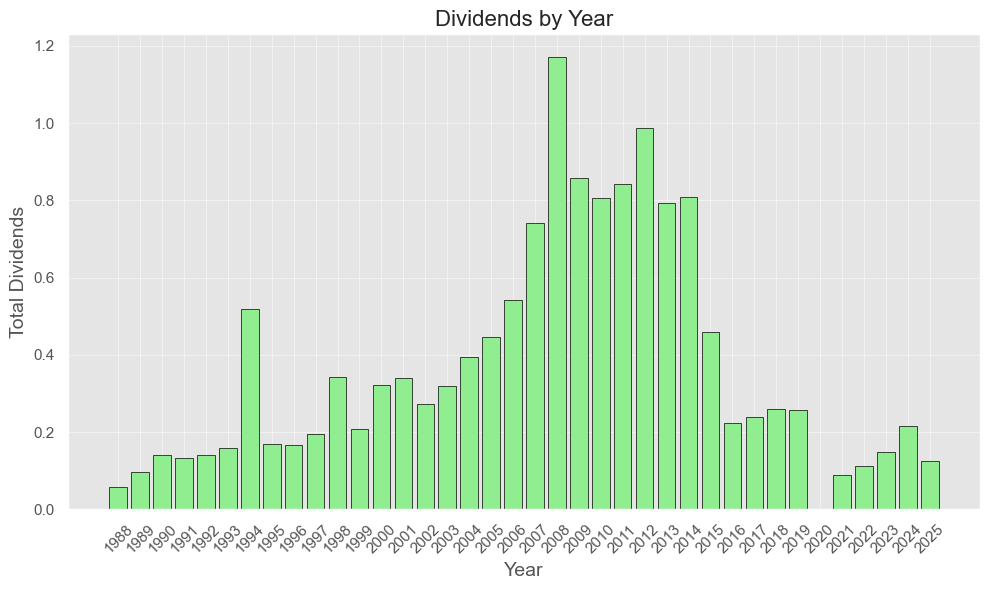

In [30]:
try:
    # Apply a style with more contrast
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Use a more contrasting color for the bars
    plt.bar(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], color='lightgreen', edgecolor='black')

    # Set x-axis ticks to display every year, and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Add labels and title
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Total Dividends', fontsize=14)
    plt.title('Dividends by Year', fontsize=16)

    # Improve grid visibility
    plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

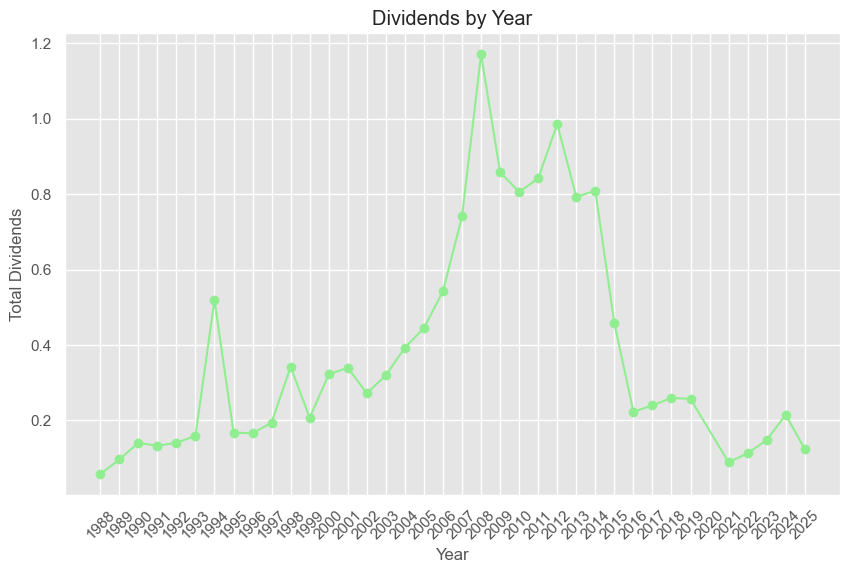

In [31]:
try:   
    # Define the style and figure size
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 6))

    # Plot the data
    plt.plot(df_new_dividends_converted['Year'], df_new_dividends_converted['Dividends'], marker = 'o', color='lightgreen')

    # Set x-axis ticks to display every year between 1 and rotate them
    plt.xticks(np.arange(df_new_dividends_converted['Year'].min(), df_new_dividends_converted['Year'].max() + 1, 1), rotation=45)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Dividends')
    plt.title('Dividends by Year')

    # Show grid and plot
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [32]:
try:
    dividend_Yield = stock_info['dividendYield']
    print(dividend_Yield)
except Exception:
    print("An exception occurred") 

2.65


In [33]:
try:
    trailingAnnualDividendYield = stock_info['trailingAnnualDividendYield']
    print(trailingAnnualDividendYield)
except Exception:
    print("An exception occurred") 

0.011494253


In [34]:
try:
    avg_DvidendYield_5_years = stock_info['fiveYearAvgDividendYield']
    print(avg_DvidendYield_5_years)
except Exception:
    print("An exception occurred") 

5.29


In [35]:
try:
    payoutRatio = stock_info['payoutRatio']
    print(payoutRatio)
except Exception:
    print("An exception occurred") 

0.2556


In [36]:
stock.splits

Date
1997-06-23 00:00:00-04:00    3.00
1998-07-06 00:00:00-04:00    2.00
1998-08-18 00:00:00-04:00    1.02
1999-06-21 00:00:00-04:00    2.00
Name: Stock Splits, dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 4. Balance Sheet Statement

In [37]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,1.552946e+07,2.978157e+08,NaN,2.775919e+08,2.843902e+07
Ordinary Shares Number,1.513696e+10,1.588633e+10,1.679440e+10,1.706305e+10,NaN
Share Issued,1.515249e+10,1.618415e+10,1.679440e+10,1.734064e+10,NaN
Net Debt,1.076290e+11,6.168400e+10,3.311200e+10,1.135800e+10,NaN
Total Debt,3.277230e+11,3.109790e+11,2.829610e+11,2.490190e+11,NaN
Tangible Book Value,7.934200e+10,7.555200e+10,7.045900e+10,7.034600e+10,NaN
Invested Capital,4.241220e+11,4.040020e+11,3.694430e+11,3.330930e+11,NaN
Net Tangible Assets,7.934200e+10,7.555200e+10,7.045900e+10,7.034600e+10,NaN
Capital Lease Obligations,2.202000e+09,2.400000e+09,2.622000e+09,2.856000e+09,NaN
Common Stock Equity,9.860100e+10,9.542300e+10,8.910400e+10,8.693000e+10,NaN


In [38]:
balance_sheet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, Treasury Shares Number to Cash Cash Equivalents And Federal Funds Sold
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2024-12-31 00:00:00  69 non-null     float64
 1   2023-12-31 00:00:00  69 non-null     float64
 2   2022-12-31 00:00:00  68 non-null     float64
 3   2021-12-31 00:00:00  69 non-null     float64
 4   2020-12-31 00:00:00  2 non-null      float64
dtypes: float64(5)
memory usage: 3.3+ KB


## 4.1 Retained Earnings

In [39]:
try:
  retained_earnings = balance_sheet_df.loc['Retained Earnings']
  retained_earnings_df = retained_earnings.to_frame(name='Retained Earnings')
  print(retained_earnings_df)
except Exception:
  print("An exception occurred") 

            Retained Earnings
2024-12-31       9.490000e+10
2023-12-31       8.519000e+10
2022-12-31       7.630700e+10
2021-12-31       6.839700e+10
2020-12-31                NaN


In [40]:
try:
    # Calculate percentage changes
    retained_earnings_pct_diff = calculate_pct_diff(balance_sheet_df.loc['Retained Earnings'])
    
    # Convert result into a DataFrame for readability
    retained_earnings_pct_diff_df = pd.DataFrame(
        [retained_earnings_pct_diff],
        columns = balance_sheet_df.columns[:-1],  # Exclude the last column since it has no comparison
        index=['% Change in Retained Earnings']
    )
    print(retained_earnings_pct_diff)
except Exception:
    print("An exception occurred") 
    

[11.398051414485268, 11.641133840932024, 11.564834714972879, nan]


In [41]:
try:
    retained_earnings_pct_diff_df_T  = retained_earnings_pct_diff_df.T
    print(retained_earnings_pct_diff_df_T)
except Exception:
    print("An exception occurred") 

            % Change in Retained Earnings
2024-12-31                      11.398051
2023-12-31                      11.641134
2022-12-31                      11.564835
2021-12-31                            NaN


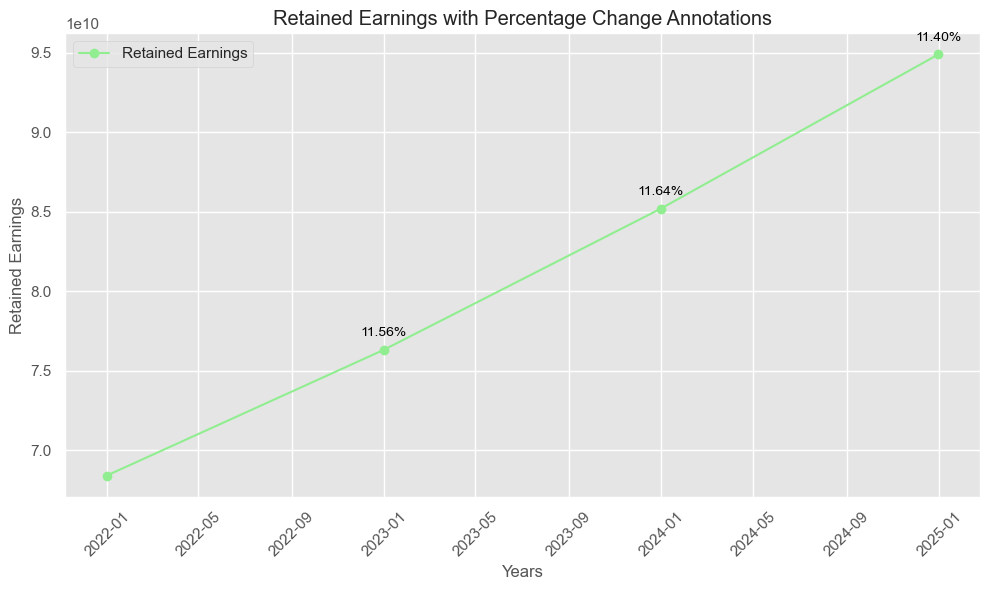

In [42]:
try:
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the Retained Earnings data
    ax.plot(retained_earnings_df.index, retained_earnings_df['Retained Earnings'], marker='o', color='lightgreen', label='Retained Earnings')

    # Annotate the plot with percentage change values from retained_earnings_pct_diff_df_T
    for date, pct_change in retained_earnings_pct_diff_df_T['% Change in Retained Earnings'].items():
        if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
            ax.annotate(f'{pct_change:.2f}%', 
                        xy=(date, retained_earnings_df.loc[date, 'Retained Earnings']), 
                        xytext=(0, 10),  # Offset to place text above the marker
                        textcoords='offset points',
                        fontsize=10, 
                        color='black', 
                        ha='center')  # Align text horizontally at the center of the point

    # Set labels and title
    plt.xlabel('Years')
    plt.ylabel('Retained Earnings')
    plt.title('Retained Earnings with Percentage Change Annotations')

    # Rotate date labels for better readability
    plt.xticks(rotation=45)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"An exception occurred: {e}")

## 4.2 Liabilities

In [43]:
balance_df_liabilities = balance_sheet_df.loc[['Payables','Current Debt And Capital Lease Obligation','Long Term Debt And Capital Lease Obligation', 'Total Capitalization']]
balance_df_liabilities

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Payables,1.193200e+10,1.215600e+10,1.186100e+10,9.902000e+09,NaN
Current Debt And Capital Lease Obligation,3.782100e+10,4.675600e+10,7.070000e+08,6.900000e+08,NaN
Long Term Debt And Capital Lease Obligation,2.899020e+11,2.642230e+11,2.822540e+11,2.483290e+11,NaN
Total Capitalization,3.868270e+11,3.578320e+11,3.694430e+11,3.330930e+11,NaN


In [44]:
pct_diff_balance_df_liabilities = balance_df_liabilities.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_liabilities.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_liabilities

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Payables,-1.842711,2.487143,19.783882,NaN
Current Debt And Capital Lease Obligation,-19.109847,6513.295615,2.463768,NaN
Long Term Debt And Capital Lease Obligation,9.718685,-6.388218,13.661312,NaN
Total Capitalization,8.102965,-3.142839,10.912868,NaN


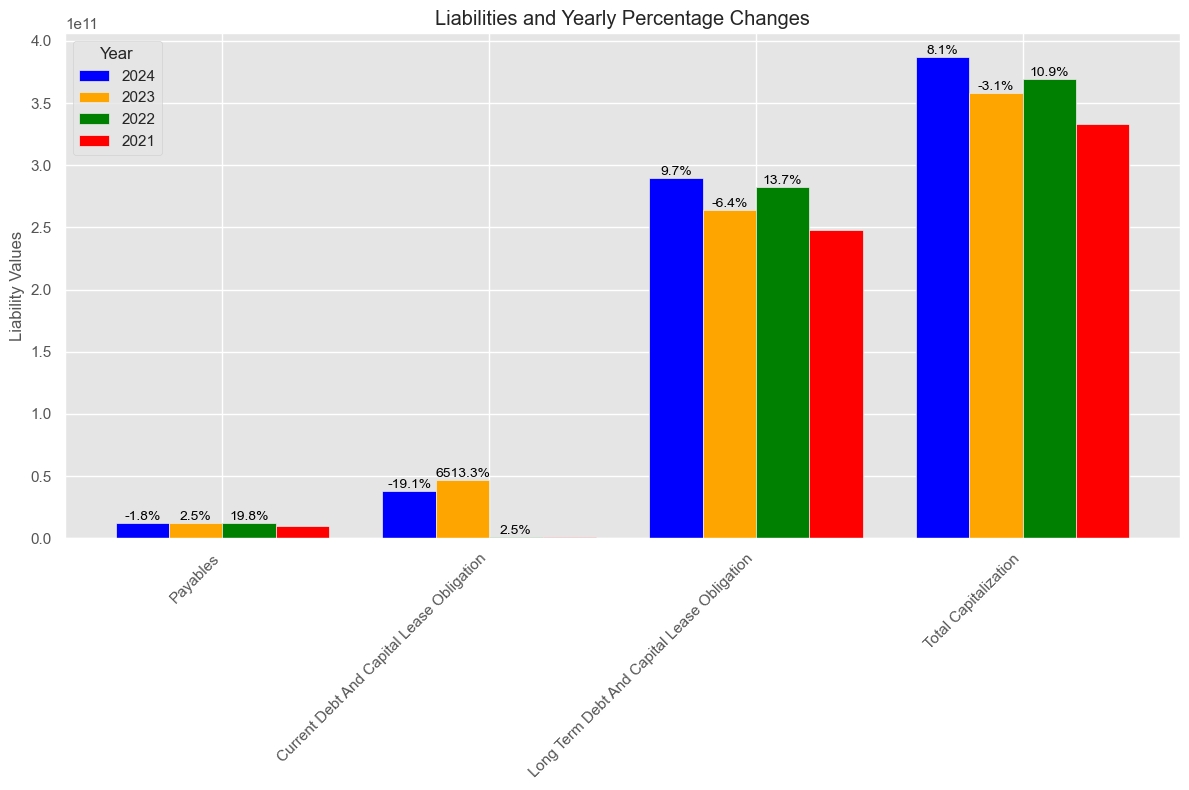

In [45]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_liabilities.columns]
pct_diff_balance_df_liabilities.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(balance_df_liabilities.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_liabilities.columns[:-1], colors)):
    values = balance_df_liabilities[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_liabilities.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_liabilities.index, rotation=45, ha='right')
ax.set_ylabel("Liability Values")
ax.set_title("Liabilities and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.3 Assets 

In [46]:
balance_df_assets = balance_sheet_df.loc[['Receivables','Cash Cash Equivalents And Federal Funds Sold','Investments And Advances','Available For Sale Securities','Trading Securities','Net PPE','Goodwill And Other Intangible Assets','Total Assets']]
balance_df_assets

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Receivables,1.142600e+10,1.062300e+10,9.200000e+09,5.756000e+09,NaN
Cash Cash Equivalents And Federal Funds Sold,2.797900e+11,3.027930e+11,2.863380e+11,2.596480e+11,NaN
Investments And Advances,3.142440e+11,2.717350e+11,2.170490e+11,1.929500e+11,NaN
Available For Sale Securities,1.881640e+11,1.653970e+11,1.344260e+11,1.143910e+11,NaN
Trading Securities,9.928200e+10,7.718100e+10,5.146900e+10,4.182700e+10,NaN
Net PPE,3.121200e+10,3.292600e+10,3.304400e+10,3.234200e+10,NaN
Goodwill And Other Intangible Assets,1.925900e+10,1.987100e+10,1.864500e+10,1.658400e+10,NaN
Total Assets,1.837081e+12,1.797062e+12,1.734659e+12,1.595835e+12,NaN


In [47]:
pct_diff_balance_df_assets = balance_df_assets.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(balance_df_assets.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_balance_df_assets

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Receivables,7.559070,15.467391,59.833218,NaN
Cash Cash Equivalents And Federal Funds Sold,-7.596939,5.746705,10.279301,NaN
Investments And Advances,15.643550,25.195232,12.489764,NaN
Available For Sale Securities,13.765062,23.039442,17.514490,NaN
Trading Securities,28.635286,49.956284,23.052096,NaN
Net PPE,-5.205613,-0.357100,2.170552,NaN
Goodwill And Other Intangible Assets,-3.079865,6.575489,12.427641,NaN
Total Assets,2.226913,3.597422,8.699145,NaN


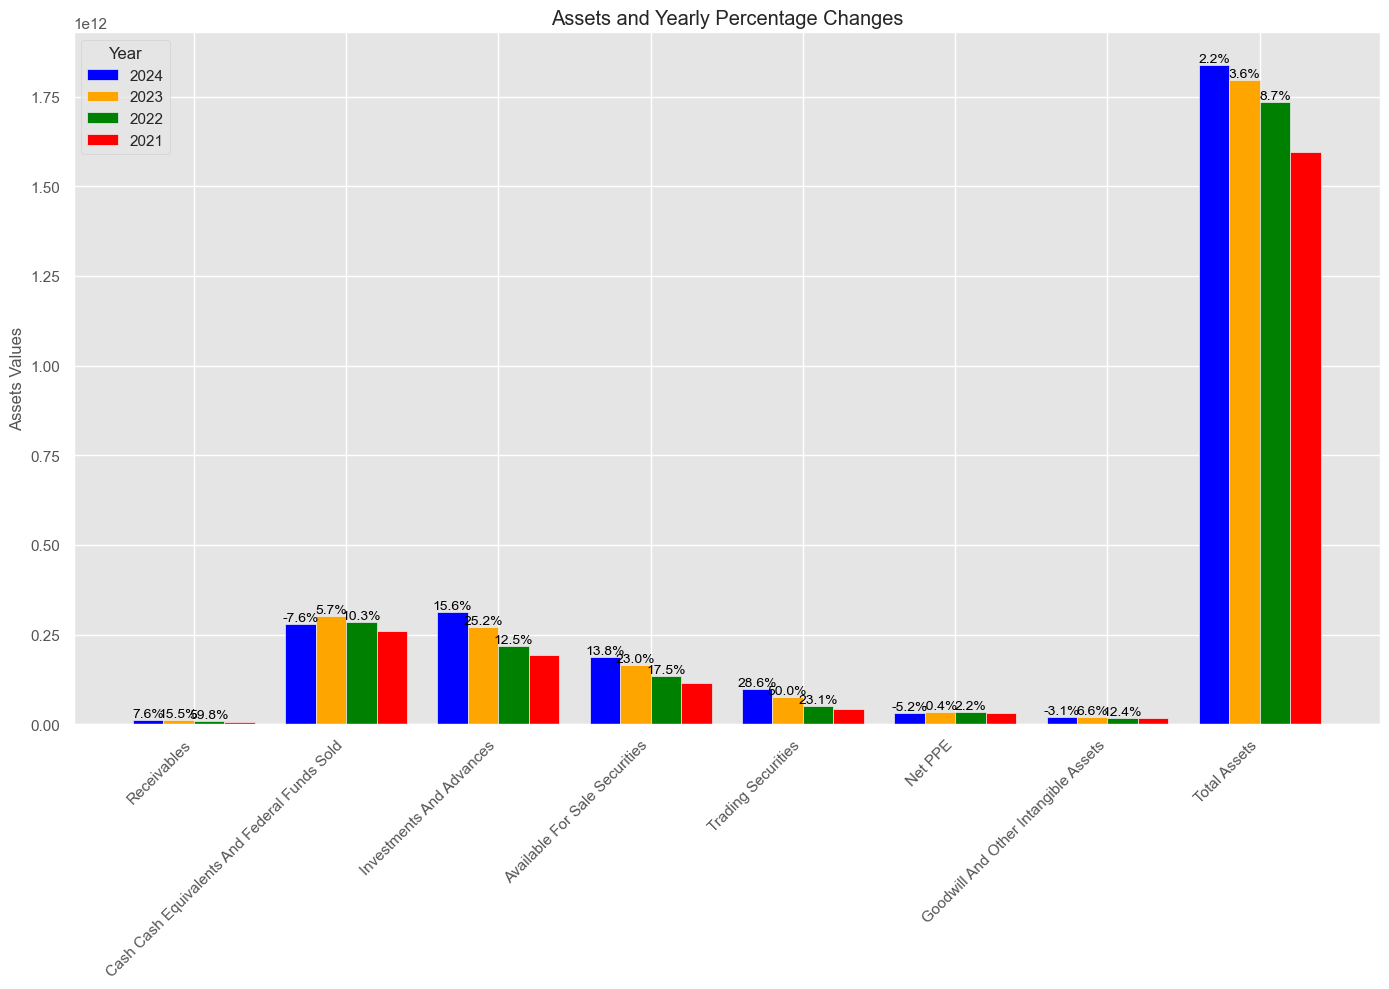

In [48]:
# Format column names
year_columns = [str(col)[:4] for col in balance_df_assets.columns]
pct_diff_balance_df_assets.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
x = np.arange(len(balance_df_assets.index))  # X positions
width = 0.2  # Bar width
colors = ['blue', 'orange', 'green', 'red']

for i, (col, color) in enumerate(zip(balance_df_assets.columns[:-1], colors)):
    values = balance_df_assets[col]
    ax.bar(x + i * width, values, width=width, label=str(col)[:4], color=color)
    
    # Add percentage text annotations
    for j, val in enumerate(values):
        if not np.isnan(val):
            pct_change = pct_diff_balance_df_assets.iloc[j, i]
            if not np.isnan(pct_change):
                ax.text(x[j] + i * width, val, f"{pct_change:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

# Labels & formatting
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(balance_df_assets.index, rotation=45, ha='right')
ax.set_ylabel("Assets Values")
ax.set_title("Assets and Yearly Percentage Changes")
ax.legend(title="Year")
plt.tight_layout()
plt.show()

## 4.4 Balance Sheet for the last year with Vertical Analysis

In [49]:
balance_sheet_df_last = pd.DataFrame(balance_sheet_df.iloc[:,0])
balance_sheet_df_last

,2024-12-31
Treasury Shares Number,1.552946e+07
Ordinary Shares Number,1.513696e+10
Share Issued,1.515249e+10
Net Debt,1.076290e+11
Total Debt,3.277230e+11
Tangible Book Value,7.934200e+10
Invested Capital,4.241220e+11
Net Tangible Assets,7.934200e+10
Capital Lease Obligations,2.202000e+09
Common Stock Equity,9.860100e+10


In [50]:
total_assets = balance_sheet_df_last.loc['Total Assets'].values[0]
balance_sheet_df_last['Percentage from Total Assets/Liabilities'] = balance_sheet_df_last.iloc[:, [0]] / total_assets * 100
balance_sheet_df_last

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,1.552946e+07,0.000845
Ordinary Shares Number,1.513696e+10,0.823968
Share Issued,1.515249e+10,0.824814
Net Debt,1.076290e+11,5.858696
Total Debt,3.277230e+11,17.839333
Tangible Book Value,7.934200e+10,4.318917
Invested Capital,4.241220e+11,23.086734
Net Tangible Assets,7.934200e+10,4.318917
Capital Lease Obligations,2.202000e+09,0.119864
Common Stock Equity,9.860100e+10,5.367265


## 4.5 Balance Sheet for the previous year with Vertical Analysis

In [51]:
balance_sheet_df = pd.DataFrame(stock.balance_sheet).astype(float)
balance_sheet_df_prev = pd.DataFrame(balance_sheet_df.iloc[:,1])
balance_sheet_df_prev

,2023-12-31
Treasury Shares Number,2.978157e+08
Ordinary Shares Number,1.588633e+10
Share Issued,1.618415e+10
Net Debt,6.168400e+10
Total Debt,3.109790e+11
Tangible Book Value,7.555200e+10
Invested Capital,4.040020e+11
Net Tangible Assets,7.555200e+10
Capital Lease Obligations,2.400000e+09
Common Stock Equity,9.542300e+10


In [52]:
total_assets = balance_sheet_df_prev.loc['Total Assets'].values[0]
balance_sheet_df_prev['Percentage from Total Assets/Liabilities'] = balance_sheet_df_prev.iloc[:, [0]] / total_assets * 100
balance_sheet_df_prev

,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,2.978157e+08,0.016572
Ordinary Shares Number,1.588633e+10,0.884017
Share Issued,1.618415e+10,0.900589
Net Debt,6.168400e+10,3.432491
Total Debt,3.109790e+11,17.304856
Tangible Book Value,7.555200e+10,4.204196
Invested Capital,4.040020e+11,22.481250
Net Tangible Assets,7.555200e+10,4.204196
Capital Lease Obligations,2.400000e+09,0.133551
Common Stock Equity,9.542300e+10,5.309945


## 4.6 Balance Sheet for the last two years with Vertical Analysis

In [53]:
df_concat_balance = pd.concat([balance_sheet_df_last, balance_sheet_df_prev], axis=1)
df_concat_balance

,2024-12-31 00:00:00,Percentage from Total Assets/Liabilities,2023-12-31 00:00:00,Percentage from Total Assets/Liabilities
Treasury Shares Number,1.552946e+07,0.000845,2.978157e+08,0.016572
Ordinary Shares Number,1.513696e+10,0.823968,1.588633e+10,0.884017
Share Issued,1.515249e+10,0.824814,1.618415e+10,0.900589
Net Debt,1.076290e+11,5.858696,6.168400e+10,3.432491
Total Debt,3.277230e+11,17.839333,3.109790e+11,17.304856
Tangible Book Value,7.934200e+10,4.318917,7.555200e+10,4.204196
Invested Capital,4.241220e+11,23.086734,4.040020e+11,22.481250
Net Tangible Assets,7.934200e+10,4.318917,7.555200e+10,4.204196
Capital Lease Obligations,2.202000e+09,0.119864,2.400000e+09,0.133551
Common Stock Equity,9.860100e+10,5.367265,9.542300e+10,5.309945


In [54]:
try:
  retained_earnings = df_concat_balance.loc['Retained Earnings'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(retained_earnings)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         94900000000.000000
Percentage from Total Assets/Liabilities              5.165804
2023-12-31 00:00:00                         85190000000.000000
Percentage from Total Assets/Liabilities              4.740515
Name: Retained Earnings, dtype: object


In [55]:
df_concat_balance.loc['Receivables'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         11426000000.000000
Percentage from Total Assets/Liabilities              0.621965
2023-12-31 00:00:00                         10623000000.000000
Percentage from Total Assets/Liabilities              0.591132
Name: Receivables, dtype: object

In [56]:
df_concat_balance.loc['Cash Cash Equivalents And Federal Funds Sold'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         279790000000.000000
Percentage from Total Assets/Liabilities              15.230140
2023-12-31 00:00:00                         302793000000.000000
Percentage from Total Assets/Liabilities              16.849335
Name: Cash Cash Equivalents And Federal Funds Sold, dtype: object

In [57]:
df_concat_balance.loc['Investments And Advances'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         314244000000.000000
Percentage from Total Assets/Liabilities              17.105615
2023-12-31 00:00:00                         271735000000.000000
Percentage from Total Assets/Liabilities              15.121070
Name: Investments And Advances, dtype: object

In [58]:
try:
  texes_receivable = df_concat_balance.loc['Invested Capital'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(texes_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         424122000000.000000
Percentage from Total Assets/Liabilities              23.086734
2023-12-31 00:00:00                         404002000000.000000
Percentage from Total Assets/Liabilities              22.481250
Name: Invested Capital, dtype: object


In [59]:
try:
  account_receivable = df_concat_balance.loc['Net PPE'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
  print(account_receivable)
except Exception:
  print("An exception occurred") 

2024-12-31 00:00:00                         31212000000.000000
Percentage from Total Assets/Liabilities              1.699000
2023-12-31 00:00:00                         32926000000.000000
Percentage from Total Assets/Liabilities              1.832213
Name: Net PPE, dtype: object


In [60]:
try:
    goodwill = df_concat_balance.loc['Goodwill'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)
    print(goodwill)
except Exception:
    print("An exception occurred") 

2024-12-31 00:00:00                         13438000000.000000
Percentage from Total Assets/Liabilities              0.731487
2023-12-31 00:00:00                         14017000000.000000
Percentage from Total Assets/Liabilities              0.779995
Name: Goodwill, dtype: object


In [61]:
df_concat_balance.loc['Long Term Debt'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                         288226000000.000000
Percentage from Total Assets/Liabilities              15.689346
2023-12-31 00:00:00                         262409000000.000000
Percentage from Total Assets/Liabilities              14.602112
Name: Long Term Debt, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 5. Cash Flow Statement

In [62]:
cash_flow = stock.cash_flow.astype(float)
cash_flow

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,-3.475300e+10,-8.628000e+09,1.686600e+10,4.528800e+10,NaN
Repurchase Of Capital Stock,-4.789000e+09,-3.109000e+09,-2.050000e+09,-1.645000e+09,NaN
Repayment Of Debt,-4.096000e+09,-2.931000e+09,-2.291000e+09,-2.684000e+09,NaN
Issuance Of Debt,7.001000e+09,7.007000e+09,1.190000e+08,5.340000e+09,NaN
Issuance Of Capital Stock,7.650000e+08,8.250000e+08,5.730000e+08,8.540000e+08,NaN
Capital Expenditure,-1.059800e+10,-1.364300e+10,-1.084000e+10,-1.140300e+10,NaN
End Cash Position,1.922080e+11,2.203420e+11,2.230730e+11,2.106890e+11,NaN
Beginning Cash Position,2.203420e+11,2.230730e+11,2.106890e+11,1.538390e+11,NaN
Effect Of Exchange Rate Changes,5.243000e+09,-3.220000e+08,-1.460000e+09,5.196000e+09,NaN
Changes In Cash,-3.337700e+10,-2.409000e+09,1.384400e+10,5.165400e+10,NaN


## 5.1 Free Cash Flow

In [63]:
free_cash_flow = pd.DataFrame(cash_flow.loc['Free Cash Flow'])
free_cash_flow

,Free Cash Flow
2024-12-31,-3.475300e+10
2023-12-31,-8.628000e+09
2022-12-31,1.686600e+10
2021-12-31,4.528800e+10
2020-12-31,NaN


In [64]:
# Calculate percentage changes
free_cash_flow_pct_diff = calculate_pct_diff(cash_flow.loc['Free Cash Flow'])

# Convert result into a DataFrame for readability
free_cash_flow_pct_diff_df = pd.DataFrame(
    [free_cash_flow_pct_diff],
    columns=cash_flow.columns[:-1],  # Exclude the last column since it has no comparison
    index=['% Change in Free Cash Flow']
)
free_cash_flow_pct_diff_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31
% Change in Free Cash Flow,302.793231,-151.156172,-62.758347,NaN


In [65]:
free_cash_flow_pct_diff_df_T  = free_cash_flow_pct_diff_df.T
free_cash_flow_pct_diff_df_T

,% Change in Free Cash Flow
2024-12-31,302.793231
2023-12-31,-151.156172
2022-12-31,-62.758347
2021-12-31,NaN


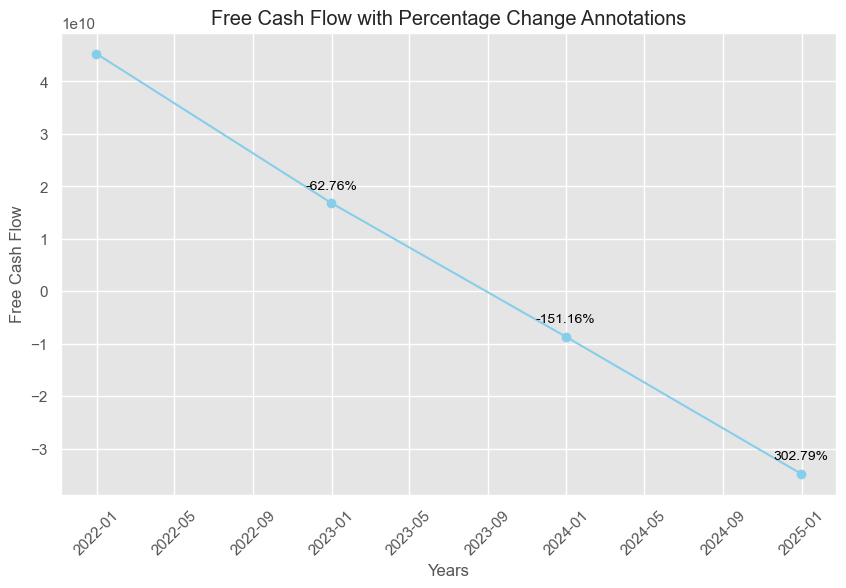

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Free Cash Flow data
ax.plot(free_cash_flow.index, free_cash_flow['Free Cash Flow'], marker = 'o', color = 'skyblue')

# Annotate the plot with percentage change values from free_cash_flow_pct_diff_df_T
for date, pct_change in free_cash_flow_pct_diff_df_T['% Change in Free Cash Flow'].items():
    if not pd.isna(pct_change):  # Only annotate if there's a valid percentage change
        # Adjust the text offset for better visibility below the markers
        ax.annotate(f'{pct_change:.2f}%', 
                    xy=(date, free_cash_flow.loc[date, 'Free Cash Flow']), 
                    xytext=(0, 10),  # Negative vertical offset to place text above the marker
                    textcoords='offset points',
                    fontsize=10, 
                    color='black', 
                    ha='center')  # Align text horizontally at the center of the point

# Set labels and title
plt.xlabel('Years')
plt.ylabel('Free Cash Flow')
plt.title('Free Cash Flow with Percentage Change Annotations')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## 5.2 Cash Flow DF

In [67]:
cash_flow_df = cash_flow.loc[['Operating Cash Flow','Investing Cash Flow', 'Financing Cash Flow']]
cash_flow_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Operating Cash Flow,-2.415500e+10,5.015000e+09,2.770600e+10,5.669100e+10,NaN
Investing Cash Flow,-3.712000e+09,-5.366000e+09,-3.898000e+09,-3.715000e+09,NaN
Financing Cash Flow,-5.510000e+09,-2.058000e+09,-9.964000e+09,-1.322000e+09,NaN


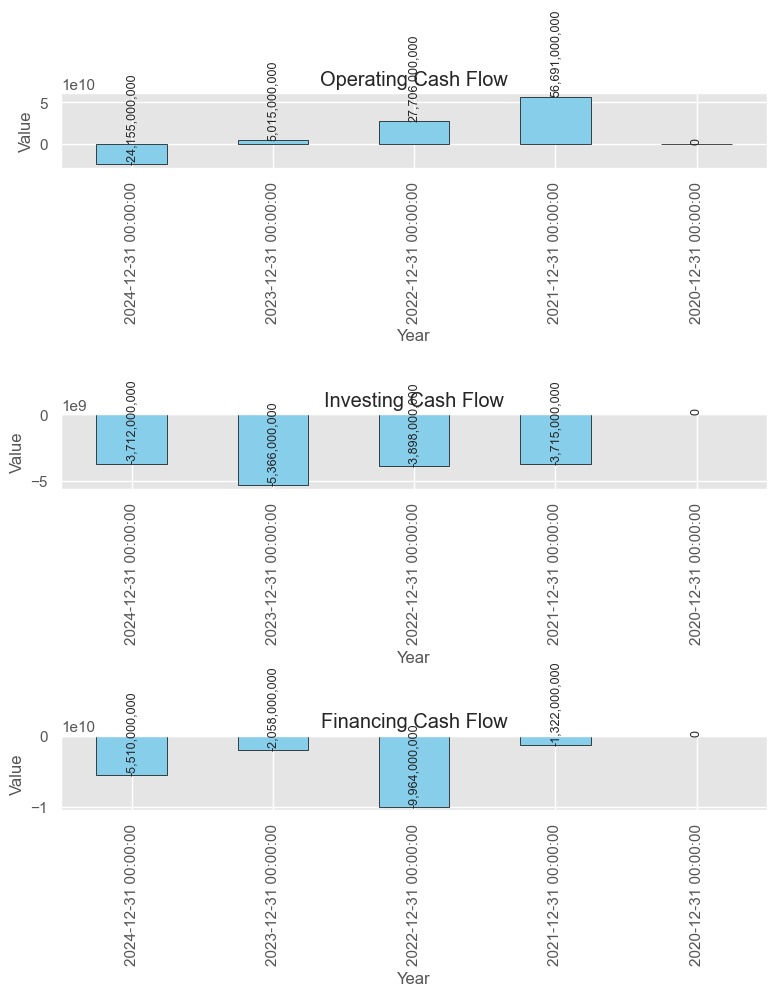

In [68]:
transposed_cash_flow_df = cash_flow_df.T

# Plot each column as a bar plot in subplots
transposed_cash_flow_df.plot(
    kind='bar',
    subplots=True,
    figsize=(8, 10),
    sharex=False,
    sharey=False,
    legend=False,  # Hide legends since column names are the titles
    color='skyblue',
    edgecolor='black',
)

# Add titles and layout adjustments
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(transposed_cash_flow_df.columns[i])  # Set column names as titles
    ax.set_xlabel("Year")
    ax.set_ylabel("Value")
    for bar in ax.patches:
        height = bar.get_height()
        if not pd.isna(height):  # Annotate bar values
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
                fontsize=9,
                rotation=90,
            )

plt.tight_layout()
plt.show()

## 5.3 Percentage changes in Cash Flow DF

In [69]:
pct_diff_cash_flow_df = cash_flow_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(cash_flow_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_cash_flow_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_cash_flow_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Operating Cash Flow,-581.655035,-81.899228,-51.128045,NaN
Investing Cash Flow,-30.823705,37.660339,4.925976,NaN
Financing Cash Flow,167.735666,-79.345644,653.706505,NaN


In [70]:
transposed_pct_diff_cash_flow_df = pct_diff_cash_flow_df.T
transposed_pct_diff_cash_flow_df

,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
2024 vs 2023,-581.655035,-30.823705,167.735666
2023 vs 2022,-81.899228,37.660339,-79.345644
2022 vs 2021,-51.128045,4.925976,653.706505
2021 vs 2020,NaN,NaN,NaN


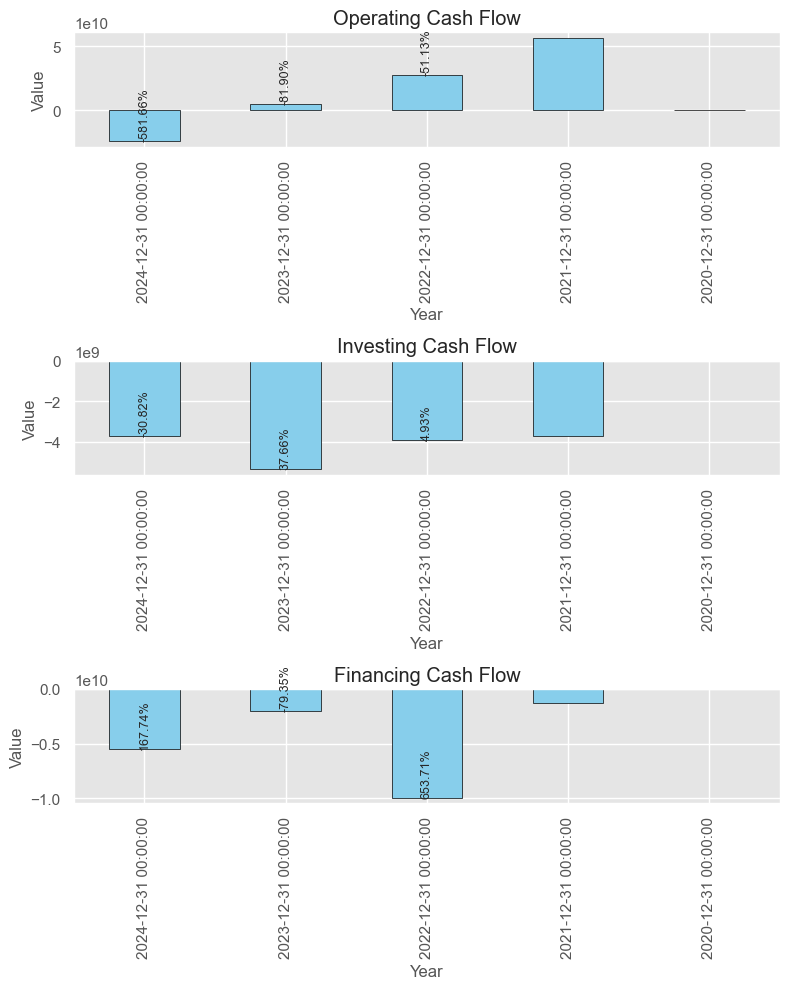

In [71]:
# Remove empty plots if any (subplots with no data)
fig, axes = plt.subplots(figsize=(8, 10), nrows=transposed_cash_flow_df.shape[1], ncols=1)

# Plot the raw cash flow data (values) and percentage changes
for i, ax in enumerate(axes):
    if i < transposed_cash_flow_df.shape[1]:  # Ensure we're within bounds
        # Plot each row (corresponding to a year) as a bar plot
        transposed_cash_flow_df.iloc[:, i].plot(
            kind='bar',
            ax=ax,
            color='skyblue',
            edgecolor='black',
            legend=False,
        )

        # Set the title and labels
        ax.set_title(transposed_cash_flow_df.columns[i])  # Set the title for each subplot
        ax.set_xlabel("Year")
        ax.set_ylabel("Value")

        # Add annotations for percentage changes
        for j, bar in enumerate(ax.patches):
            height = bar.get_height()

            if not pd.isna(height):  # Check if the value is not NaN
                # Extract the corresponding percentage change
                if j < len(transposed_pct_diff_cash_flow_df.index) and i < len(transposed_pct_diff_cash_flow_df.columns):
                    pct_change = transposed_pct_diff_cash_flow_df.iloc[j, i]  # Correct row and column access
                else:
                    pct_change = None

                if pd.notna(pct_change):  # Only annotate if the percentage change is available
                    ax.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{pct_change:.2f}%",  # Annotation with percentage change
                        ha="center",
                        va="bottom",
                        fontsize=9,
                        rotation=90,
                    )

plt.tight_layout()
plt.show()

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 6. Income Statement

In [72]:
income_statement = pd.DataFrame(stock.income_stmt).astype(float)
income_statement

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,-1.788388e+08,-4.936200e+07,-6.619500e+07,-7.501720e+07,NaN
Tax Rate For Calcs,2.777000e-01,2.598000e-01,2.942000e-01,3.364000e-01,NaN
Total Unusual Items,-6.440000e+08,-1.900000e+08,-2.250000e+08,-2.230000e+08,NaN
Total Unusual Items Excluding Goodwill,-6.440000e+08,-1.900000e+08,-2.250000e+08,-2.230000e+08,NaN
Net Income From Continuing Operation Net Minority Interest,1.257400e+10,1.107600e+10,9.605000e+09,8.124000e+09,NaN
Reconciled Depreciation,3.294000e+09,3.184000e+09,2.985000e+09,2.756000e+09,NaN
Net Interest Income,4.666800e+10,4.326100e+10,3.861900e+10,3.337000e+10,NaN
Interest Expense,6.606700e+10,6.199100e+10,3.281100e+10,1.309300e+10,NaN
Interest Income,1.127350e+11,1.052520e+11,7.143000e+10,4.646300e+10,NaN
Normalized Income,1.303916e+10,1.121664e+10,9.763805e+09,8.271983e+09,NaN


## 6.1 Income Statement DF

In [73]:
income_statement_df = income_statement.loc[['Total Revenue','General And Administrative Expense','Net Income Common Stockholders',
                                                'Diluted EPS']]
income_statement_df

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Total Revenue,6.384200e+10,5.987800e+10,5.421600e+10,4.840600e+10,NaN
General And Administrative Expense,2.164400e+10,2.106800e+10,1.980000e+10,1.759100e+10,NaN
Net Income Common Stockholders,1.195400e+10,1.058400e+10,9.076000e+09,7.558000e+09,NaN
Diluted EPS,7.680000e-01,6.510000e-01,5.370000e-01,4.360000e-01,NaN


In [74]:
pct_diff_income_statement_df = income_statement_df.apply(calculate_pct_diff, axis=1, result_type='expand')

# Convert column names to datetime and format them properly
year_columns = pd.to_datetime(income_statement_df.columns).strftime('%Y')

# Dynamically generate column names based on the original DataFrame
pct_diff_income_statement_df.columns = [f"{year_columns[i]} vs {year_columns[i+1]}" for i in range(len(year_columns) - 1)]

pct_diff_income_statement_df

,2024 vs 2023,2023 vs 2022,2022 vs 2021,2021 vs 2020
Total Revenue,6.620128,10.443412,12.002644,NaN
General And Administrative Expense,2.734004,6.404040,12.557558,NaN
Net Income Common Stockholders,12.944067,16.615249,20.084678,NaN
Diluted EPS,17.972350,21.229050,23.165138,NaN


In [75]:
transposed_df_income = income_statement_df.T
transposed_df_income

,Total Revenue,General And Administrative Expense,Net Income Common Stockholders,Diluted EPS
2024-12-31,6.384200e+10,2.164400e+10,1.195400e+10,0.768
2023-12-31,5.987800e+10,2.106800e+10,1.058400e+10,0.651
2022-12-31,5.421600e+10,1.980000e+10,9.076000e+09,0.537
2021-12-31,4.840600e+10,1.759100e+10,7.558000e+09,0.436
2020-12-31,NaN,NaN,NaN,NaN


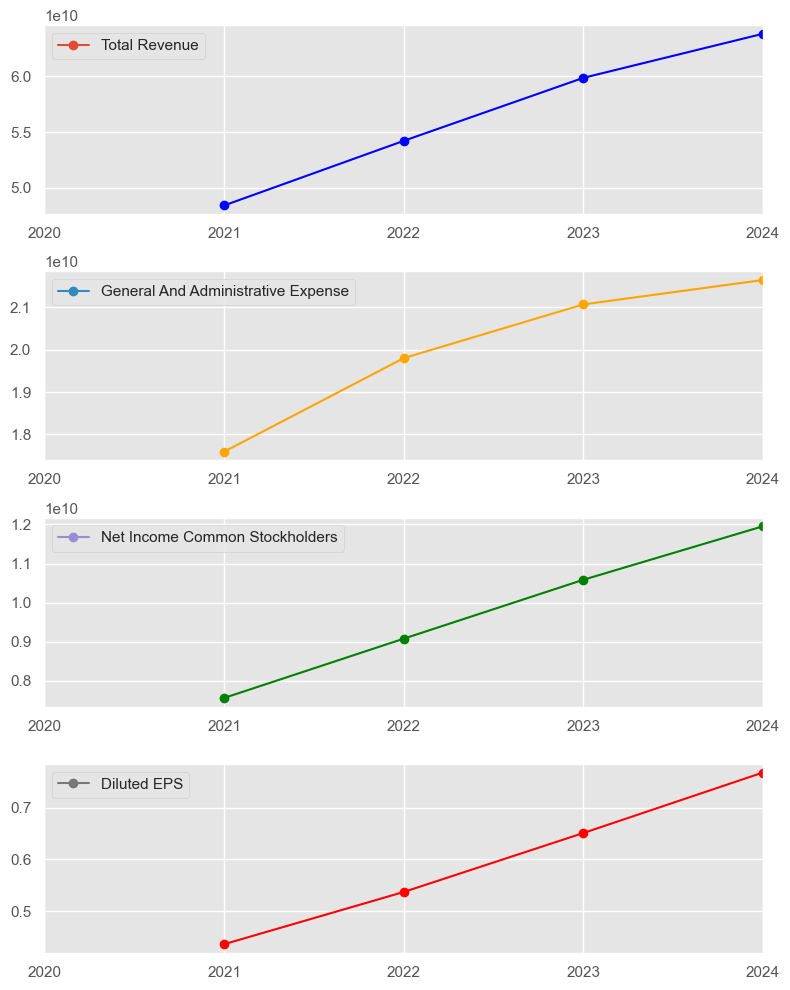

In [76]:
# Create subplots and assign unique colors
ax = transposed_df_income.plot(kind='line', marker='o', subplots=True, figsize=(8, 10), sharex=False, sharey=False)

# Assign distinct colors
for idx, axis in enumerate(ax):  # Loop through subplots
    color = colors[idx % len(colors)]  # Cycle through colors if needed
    for line in axis.get_lines():
        line.set_color(color)  # Apply unique color to each subplot

plt.tight_layout()
plt.show()

## 6.2 Percentage changes in Income Statement DF

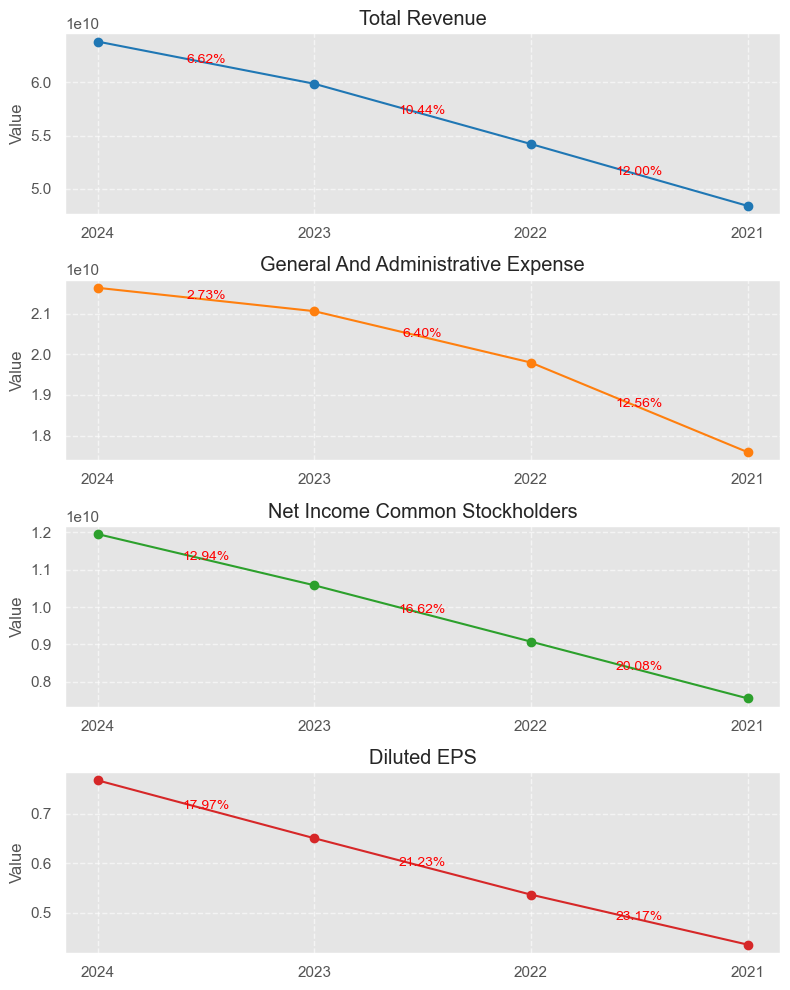

In [77]:
# Convert column names to years
years = [str(col.year) for col in income_statement_df.columns]

# Define colors
colors = plt.cm.tab10.colors

# Plot each row separately
fig, axes = plt.subplots(nrows=len(income_statement_df), figsize=(8, 10), sharex=False, sharey=False)

for idx, (ax, (row, values)) in enumerate(zip(axes, income_statement_df.iterrows())):
    color = colors[idx % len(colors)]  # Assign unique color
    ax.plot(years, values, marker='o', linestyle='-', label=row, color=color)
    ax.set_title(row)
    ax.set_ylabel("Value")
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Add percentage annotations
    pct_changes = pct_diff_income_statement_df.loc[row].values  # Convert to array for indexing
    for i in range(len(pct_changes)):
        if not np.isnan(pct_changes[i]):
            ax.text(i + 0.5, (values.iloc[i] + values.iloc[i+1]) / 2, f"{pct_changes[i]:.2f}%", 
                    fontsize=10, color='red', ha='center')

plt.tight_layout()
plt.show()

## 6.3 Income Statement for the last year with Vertical Analysis

In [78]:
income_statement_last = pd.DataFrame(income_statement.iloc[:,0])
income_statement_last

,2024-12-31
Tax Effect Of Unusual Items,-1.788388e+08
Tax Rate For Calcs,2.777000e-01
Total Unusual Items,-6.440000e+08
Total Unusual Items Excluding Goodwill,-6.440000e+08
Net Income From Continuing Operation Net Minority Interest,1.257400e+10
Reconciled Depreciation,3.294000e+09
Net Interest Income,4.666800e+10
Interest Expense,6.606700e+10
Interest Income,1.127350e+11
Normalized Income,1.303916e+10


In [79]:
revenue = income_statement_last.loc['Operating Revenue'].values[0]
income_statement_last['Percentage from Operating Revenue'] = income_statement_last.iloc[:, [0]] / revenue * 100
income_statement_last

,2024-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-1.788388e+08,-2.801272e-01
Tax Rate For Calcs,2.777000e-01,4.349801e-10
Total Unusual Items,-6.440000e+08,-1.008740e+00
Total Unusual Items Excluding Goodwill,-6.440000e+08,-1.008740e+00
Net Income From Continuing Operation Net Minority Interest,1.257400e+10,1.969550e+01
Reconciled Depreciation,3.294000e+09,5.159613e+00
Net Interest Income,4.666800e+10,7.309921e+01
Interest Expense,6.606700e+10,1.034852e+02
Interest Income,1.127350e+11,1.765844e+02
Normalized Income,1.303916e+10,2.042411e+01


## 6.4 Income Statement for the previous year with Vertical Analysis

In [80]:
income_statement_prev = pd.DataFrame(income_statement.iloc[:,1])
income_statement_prev

,2023-12-31
Tax Effect Of Unusual Items,-4.936200e+07
Tax Rate For Calcs,2.598000e-01
Total Unusual Items,-1.900000e+08
Total Unusual Items Excluding Goodwill,-1.900000e+08
Net Income From Continuing Operation Net Minority Interest,1.107600e+10
Reconciled Depreciation,3.184000e+09
Net Interest Income,4.326100e+10
Interest Expense,6.199100e+10
Interest Income,1.052520e+11
Normalized Income,1.121664e+10


In [81]:
revenue = income_statement_prev.loc['Operating Revenue'].values[0]
income_statement_prev['Percentage from Operating Revenue'] = income_statement_prev.iloc[:, [0]] / revenue * 100
income_statement_prev

,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-4.936200e+07,-8.243762e-02
Tax Rate For Calcs,2.598000e-01,4.338822e-10
Total Unusual Items,-1.900000e+08,-3.173119e-01
Total Unusual Items Excluding Goodwill,-1.900000e+08,-3.173119e-01
Net Income From Continuing Operation Net Minority Interest,1.107600e+10,1.849761e+01
Reconciled Depreciation,3.184000e+09,5.317479e+00
Net Interest Income,4.326100e+10,7.224857e+01
Interest Expense,6.199100e+10,1.035288e+02
Interest Income,1.052520e+11,1.757774e+02
Normalized Income,1.121664e+10,1.873249e+01


## 6.5 Income Statement for the last two years with Vertical Analysis

In [82]:
df_concat_income = pd.concat([income_statement_last, income_statement_prev], axis=1)
df_concat_income

,2024-12-31 00:00:00,Percentage from Operating Revenue,2023-12-31 00:00:00,Percentage from Operating Revenue
Tax Effect Of Unusual Items,-1.788388e+08,-2.801272e-01,-4.936200e+07,-8.243762e-02
Tax Rate For Calcs,2.777000e-01,4.349801e-10,2.598000e-01,4.338822e-10
Total Unusual Items,-6.440000e+08,-1.008740e+00,-1.900000e+08,-3.173119e-01
Total Unusual Items Excluding Goodwill,-6.440000e+08,-1.008740e+00,-1.900000e+08,-3.173119e-01
Net Income From Continuing Operation Net Minority Interest,1.257400e+10,1.969550e+01,1.107600e+10,1.849761e+01
Reconciled Depreciation,3.294000e+09,5.159613e+00,3.184000e+09,5.317479e+00
Net Interest Income,4.666800e+10,7.309921e+01,4.326100e+10,7.224857e+01
Interest Expense,6.606700e+10,1.034852e+02,6.199100e+10,1.035288e+02
Interest Income,1.127350e+11,1.765844e+02,1.052520e+11,1.757774e+02
Normalized Income,1.303916e+10,2.042411e+01,1.121664e+10,1.873249e+01


In [83]:
df_concat_income.loc['Operating Revenue'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  63842000000.000000
Percentage from Operating Revenue            100.000000
2023-12-31 00:00:00                  59878000000.000000
Percentage from Operating Revenue            100.000000
Name: Operating Revenue, dtype: object

In [84]:
df_concat_income.loc['General And Administrative Expense'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)


2024-12-31 00:00:00                  21644000000.000000
Percentage from Operating Revenue             33.902447
2023-12-31 00:00:00                  21068000000.000000
Percentage from Operating Revenue             35.184876
Name: General And Administrative Expense, dtype: object

In [85]:
df_concat_income.loc['Net Income Common Stockholders'].map(lambda x: f"{x:.6f}" if isinstance(x, float) else x)

2024-12-31 00:00:00                  11954000000.000000
Percentage from Operating Revenue             18.724351
2023-12-31 00:00:00                  10584000000.000000
Percentage from Operating Revenue             17.675941
Name: Net Income Common Stockholders, dtype: object

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 7. Ratio Analysis

__Net Profit Margin%__

In [86]:
net_profit_margin = (income_statement.loc['Net Income'].replace(0, np.nan).astype(float) / income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float)) * 100
net_profit_margin

2024-12-31    19.695498
2023-12-31    18.497612
2022-12-31    17.716172
2021-12-31    16.783043
2020-12-31          NaN
dtype: float64

__ROA%__

In [87]:
net_income = income_statement.loc['Net Income'].replace(0, np.nan).astype(float)
avg_assets = balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float).mean()
ROA = net_income / avg_assets  * 100
ROA

2024-12-31    0.722163
2023-12-31    0.636128
2022-12-31    0.551644
2021-12-31    0.466586
2020-12-31         NaN
Name: Net Income, dtype: float64

__Asset Turnover%__

In [88]:
asset_turnover = income_statement.loc['Total Revenue'].replace(0, np.nan).astype(float) / avg_assets * 100
asset_turnover

2024-12-31    3.666638
2023-12-31    3.438973
2022-12-31    3.113788
2021-12-31    2.780102
2020-12-31         NaN
Name: Total Revenue, dtype: float64

__Equity Ratio%__

In [89]:
equity_ratio = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)/balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float) * 100
equity_ratio

2024-12-31    5.367265
2023-12-31    5.309945
2022-12-31    5.136687
2021-12-31    5.447305
2020-12-31         NaN
dtype: float64

__Leverage__

If Leverage = 1, it means that the assets are financed entirely with equity (no debt). <br>
If Leverage = 20, it means that for every 1 unit of equity, the company has 20 units of assets – the rest is financed with debt.

In [90]:
leverage = balance_sheet_df.loc['Total Assets'].replace(0, np.nan).astype(float) / balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
leverage

2024-12-31    18.631464
2023-12-31    18.832588
2022-12-31    19.467802
2021-12-31    18.357702
2020-12-31          NaN
dtype: float64

__Cost-to-Income Ratio%__

A lower C/I ratio → the company is more efficient, spending less for each unit of revenue. <br>
A higher C/I ratio → the company spends more relative to its revenue, which may indicate inefficiency. <br>
A good C/I ratio is usually between 40% and 60%.

In [91]:
operating_expenses = (
    income_statement.loc['Selling General And Administration'].fillna(0).astype(float) +
    income_statement.loc['Other Non Interest Expense'].fillna(0).astype(float) +
    income_statement.loc['Reconciled Depreciation'].fillna(0).astype(float)
)
operating_expenses

2024-12-31    3.224100e+10
2023-12-31    3.093000e+10
2022-12-31    2.858700e+10
2021-12-31    2.667100e+10
2020-12-31    0.000000e+00
dtype: float64

In [92]:
operating_income = income_statement_df.loc['Total Revenue'].astype(float)
operating_income

2024-12-31    6.384200e+10
2023-12-31    5.987800e+10
2022-12-31    5.421600e+10
2021-12-31    4.840600e+10
2020-12-31             NaN
Name: Total Revenue, dtype: float64

In [93]:
cost_to_income_ratio = operating_expenses / operating_income * 100
cost_to_income_ratio

2024-12-31    50.501237
2023-12-31    51.655032
2022-12-31    52.727977
2021-12-31    55.098542
2020-12-31          NaN
dtype: float64

__Capital Adequacy Ratio%__

A higher CAR → the bank is more stable, having more capital to cover potential losses. <br>
A lower CAR → the bank is riskier and may face problems under financial stress. <br>
Basel standards for minimum CAR → minimum 8%–10.5%, depending on additional buffers.

In [94]:
tier1_capital = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
tier1_capital

2024-12-31    9.860100e+10
2023-12-31    9.542300e+10
2022-12-31    8.910400e+10
2021-12-31    8.693000e+10
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [95]:
rwa_proxy = balance_sheet_df.loc['Total Assets'].astype(float) * 0.5  
rwa_proxy

2024-12-31    9.185405e+11
2023-12-31    8.985310e+11
2022-12-31    8.673295e+11
2021-12-31    7.979175e+11
2020-12-31             NaN
Name: Total Assets, dtype: float64

In [96]:
CAR_proxy = (tier1_capital / rwa_proxy) * 100
CAR_proxy

2024-12-31    10.734529
2023-12-31    10.619890
2022-12-31    10.273374
2021-12-31    10.894610
2020-12-31          NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 8. ROIC_bank & WACC

__ROIC_bank__

In [97]:
net_income = income_statement.loc['Net Income']
net_income

2024-12-31    1.257400e+10
2023-12-31    1.107600e+10
2022-12-31    9.605000e+09
2021-12-31    8.124000e+09
2020-12-31             NaN
Name: Net Income, dtype: float64

In [98]:
invested_capital = balance_sheet_df.loc["Common Stock Equity"].astype(float)
invested_capital

2024-12-31    9.860100e+10
2023-12-31    9.542300e+10
2022-12-31    8.910400e+10
2021-12-31    8.693000e+10
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [99]:
ROIC_bank = net_income / invested_capital
ROIC_bank

2024-12-31    0.127524
2023-12-31    0.116073
2022-12-31    0.107795
2021-12-31    0.093455
2020-12-31         NaN
dtype: float64

__WACC__

In [100]:
def calculate_wacc(E, D, Ke, Kd, tax_rate):
    equity_weight = E / (E + D)
    debt_weight = D / (E + D)
    wacc = (equity_weight * Ke) + (debt_weight * Kd) * (1 - tax_rate)
    return wacc

In [101]:
E = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
D = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
Ke = 0.1
Kd = 0.06
tax_rate = 0.3

In [102]:
wacc_result = calculate_wacc(E, D, Ke, Kd, tax_rate)
wacc_result

2024-12-31    0.056784
2023-12-31    0.057467
2022-12-31    0.055989
2021-12-31    0.057137
2020-12-31         NaN
dtype: float64

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 9. Reinvestment Rate & Growth Rate%

In [103]:
net_income = income_statement.loc['Net Income'].replace(0, np.nan).astype(float)
net_income

2024-12-31    1.257400e+10
2023-12-31    1.107600e+10
2022-12-31    9.605000e+09
2021-12-31    8.124000e+09
2020-12-31             NaN
Name: Net Income, dtype: float64

In [104]:
dividends = df_new_dividends_converted['Dividends'].replace(0, np.nan).astype(float).tail(1).item()
dividends

0.124

In [105]:
reinvestment_rate = (net_income - dividends)  / net_income
reinvestment_rate

2024-12-31    1.0
2023-12-31    1.0
2022-12-31    1.0
2021-12-31    1.0
2020-12-31    NaN
Name: Net Income, dtype: float64

In [106]:
growth_rate = (reinvestment_rate * ROIC_bank) * 100
growth_rate 

2024-12-31    12.752406
2023-12-31    11.607264
2022-12-31    10.779539
2021-12-31     9.345450
2020-12-31          NaN
dtype: float64

In [107]:
expected_growth_rate = (reinvestment_rate * ROIC_bank).mean() * 100
expected_growth_rate

11.121164884200684

__The growth rate represents the sustainable rate at which a company can grow its operating profit (NOPAT) over time without raising new capital (i.e., only reinvesting internally generated cash).__

__Growth Rate Range	Interpretation for banks <br>
0% – 5%	Healthy growth — strong reinvestment or high efficiency. Good sign if sustainable.<br>
< 0%	Negative growth — shrinking operations, divestitures, or declining efficiency. Could be strategic (e.g., refocusing), or a red flag.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 10. Dividend Coverage Ratio

In [108]:
EPS = income_statement.loc['Basic EPS'].replace(0, np.nan).astype(float)
EPS

2024-12-31    0.771
2023-12-31    0.654
2022-12-31    0.539
2021-12-31    0.438
2020-12-31      NaN
Name: Basic EPS, dtype: float64

In [109]:
df_new_dividends_converted

,Year,Dividends
0,1988,0.057190
1,1989,0.096486
2,1990,0.140523
3,1991,0.132843
4,1992,0.140768
5,1993,0.159150
6,1994,0.519445
7,1995,0.168056
8,1996,0.165605
9,1997,0.194363


__DCR > 2.0 — Very safe dividend. The company earns at least twice what it pays out.__<br>
__DCR ≈ 1.5 – 2.0 — Generally safe, but less buffer.__<br>
__DCR < 1.0 — Warning sign. The company is paying out more in dividends than it earns, which is unsustainable long-term (may rely on debt or reserves).__<br>

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 11. Long-term Debt to Equity Ratio & Net Interest Margin%

__DE__

In [110]:
long_term_debt = balance_sheet_df.loc['Long Term Debt'].replace(0, np.nan).astype(float)
long_term_debt

2024-12-31    2.882260e+11
2023-12-31    2.624090e+11
2022-12-31    2.803390e+11
2021-12-31    2.461630e+11
2020-12-31             NaN
Name: Long Term Debt, dtype: float64

In [111]:
equity = balance_sheet_df.loc['Common Stock Equity'].replace(0, np.nan).astype(float)
equity

2024-12-31    9.860100e+10
2023-12-31    9.542300e+10
2022-12-31    8.910400e+10
2021-12-31    8.693000e+10
2020-12-31             NaN
Name: Common Stock Equity, dtype: float64

In [112]:
debt_equity_ratio = long_term_debt / equity
debt_equity_ratio

2024-12-31    2.923155
2023-12-31    2.749955
2022-12-31    3.146200
2021-12-31    2.831738
2020-12-31         NaN
dtype: float64

__Net Interest Margin%__

In [113]:
net_interest_income = income_statement.loc['Net Interest Income'].astype(float)
net_interest_income

2024-12-31    4.666800e+10
2023-12-31    4.326100e+10
2022-12-31    3.861900e+10
2021-12-31    3.337000e+10
2020-12-31             NaN
Name: Net Interest Income, dtype: float64

In [114]:
earning_assets = balance_sheet_df.loc['Total Assets'].astype(float)
earning_assets

2024-12-31    1.837081e+12
2023-12-31    1.797062e+12
2022-12-31    1.734659e+12
2021-12-31    1.595835e+12
2020-12-31             NaN
Name: Total Assets, dtype: float64

In [115]:
average_assets = earning_assets.mean()
average_assets

1741159250000.0

In [116]:
NIM = (net_interest_income / average_assets) * 100
NIM

2024-12-31    2.680283
2023-12-31    2.484609
2022-12-31    2.218005
2021-12-31    1.916539
2020-12-31         NaN
Name: Net Interest Income, dtype: float64

__How much interest income the bank generates for every unit of assets. <br>
3%–4% Healthy NIM. Indicates that the bank efficiently manages the difference between its interest income and interest expenses. <br>
< 3% Low NIM. May signal high funding costs or low interest income.<br> > 4% High NIM. May indicate the bank has a competitive advantage, but it could also result from taking higher risk.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 12. Operating Cash to Total Liabilities%

In [117]:
operating_cash = cash_flow.loc['Operating Cash Flow']
operating_cash

2024-12-31   -2.415500e+10
2023-12-31    5.015000e+09
2022-12-31    2.770600e+10
2021-12-31    5.669100e+10
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [118]:
total_liabilities = balance_sheet_df.loc["Total Liabilities Net Minority Interest"] 
total_liabilities

2024-12-31    1.729754e+12
2023-12-31    1.692821e+12
2022-12-31    1.637074e+12
2021-12-31    1.498782e+12
2020-12-31             NaN
Name: Total Liabilities Net Minority Interest, dtype: float64

In [119]:
operating_cash_To_total_liabilities = (operating_cash / total_liabilities) * 100
operating_cash_To_total_liabilities

2024-12-31   -1.396441
2023-12-31    0.296251
2022-12-31    1.692410
2021-12-31    3.782471
2020-12-31         NaN
dtype: float64

__≈ 3%–7% Healthy ratio. Indicates that the bank generates enough operating cash relative to its huge obligations (including deposits). <br>
≈ 1%–3% Moderate ratio. Not critical, but shows that cash flow is lower relative to liabilities → the trend should be monitored. <br>
< 1% Poor. A signal of potential liquidity issues or dependence on external financing.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 13. Operating Cash to Market Capitalization%

In [120]:
operating_cash_last = cash_flow.loc['Operating Cash Flow'].iloc[0]
operating_cash_last

-24155000000.0

In [121]:
operating_cash_To_market_cap = (operating_cash_last / market_cap) * 100
operating_cash_To_market_cap

-17.33327250169623

In [122]:
dif_for_non_current_assets = market_cap - operating_cash_last
dif_for_non_current_assets

163511258304.0

In [123]:
real_non_current_assets = balance_sheet_df.iloc[:,0].loc['Total Assets'] - balance_sheet_df.iloc[:,0].loc['Cash Cash Equivalents And Federal Funds Sold']
real_non_current_assets

1557291000000.0

__~ 3%–10%  Healthy. The bank generates enough cash relative to its market value. Signals strong operational efficiency and liquidity. <br>
~ 1%–3% Moderate. Cash generation is lower relative to market value → watch trends over time. <br>
< 1% Poor. Bank generates very little cash relative to market cap → may indicate liquidity risk or operational stress.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 

# 14. Operating Cash to Net Income%

In [124]:
operating_cash = cash_flow.loc['Operating Cash Flow'].replace(0, np.nan).astype(float)
operating_cash

2024-12-31   -2.415500e+10
2023-12-31    5.015000e+09
2022-12-31    2.770600e+10
2021-12-31    5.669100e+10
2020-12-31             NaN
Name: Operating Cash Flow, dtype: float64

In [125]:
net_income = income_statement_df.loc['Net Income Common Stockholders'].replace(0, np.nan).astype(float)
net_income

2024-12-31    1.195400e+10
2023-12-31    1.058400e+10
2022-12-31    9.076000e+09
2021-12-31    7.558000e+09
2020-12-31             NaN
Name: Net Income Common Stockholders, dtype: float64

In [126]:
operating_cash_To_net_income = (operating_cash / net_income) * 100
operating_cash_To_net_income

2024-12-31   -202.066254
2023-12-31     47.382842
2022-12-31    305.266637
2021-12-31    750.079386
2020-12-31           NaN
dtype: float64

__> 100% Strong cash flow. The company generates more cash than its reported net income (good for financial health).__ <br>
__≈ 100% Net income and cash flow are closely aligned, suggesting good earnings quality.__ <br>
__< 100% Earnings are higher than cash flow. Possible reasons: aggressive revenue recognition, high non-cash expenses, or rising working capital.__ <br>
__< 0 (negative)	Operating cash flow is negative, meaning the company burns cash while reporting net income (could signal financial distress).__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>

# 15. The Bank Z-score

In [127]:
def calculate_bank_z_score(balance_sheet, income_statement, roa_std_dev=0.05):
    # Convert column names to strings for consistent access
    balance_sheet_cols = [str(col) for col in balance_sheet.columns]
    income_statement_cols = [str(col) for col in income_statement.columns]
    
    results = pd.DataFrame(index=balance_sheet_cols)
    
    for i, year in enumerate(balance_sheet.columns):
        year_str = str(year)
        try:
            # Get total assets - using the correct column name from your data
            total_assets = balance_sheet.loc['Total Assets', year_str]
            
            # Get equity - trying multiple possible names from your data
            equity_alternatives = [
                'Total Equity Gross Minority Interest',
                'Common Stock Equity',
                'Stockholders Equity',
                'Net Tangible Assets',
                'Tangible Book Value'
            ]
            
            equity_value = None
            equity_name = None
            for equity_item in equity_alternatives:
                if equity_item in balance_sheet.index:
                    value = balance_sheet.loc[equity_item, year_str]
                    if not pd.isna(value) and value != 0:
                        equity_value = value
                        equity_name = equity_item
                        break
            
            if equity_value is None:
                print(f"No valid equity measure found for {year_str}")
                continue
            
            # Get net income - trying multiple possible names
            net_income_alternatives = [
                'Net Income',
                'Net Income Common Stockholders',
                'Net Income From Continuing Operation Net Minority Interest'
            ]
            
            net_income = None
            net_income_name = None
            for income_item in net_income_alternatives:
                if income_item in income_statement.index:
                    value = income_statement.loc[income_item, year_str]
                    if not pd.isna(value) and value != 0:
                        net_income = value
                        net_income_name = income_item
                        break
            
            if net_income is None:
                print(f"No valid net income measure found for {year_str}")
                continue
            
            # Get net interest income - trying multiple possible names
            nii_alternatives = [
                'Net Interest Income',
                'Interest Income'  # Using Interest Income as fallback
            ]
            
            net_interest_income = None
            nii_name = None
            for nii_item in nii_alternatives:
                if nii_item in income_statement.index:
                    value = income_statement.loc[nii_item, year_str]
                    if not pd.isna(value) and value != 0:
                        net_interest_income = value
                        nii_name = nii_item
                        break
            
            if net_interest_income is None:
                print(f"No net interest income measure found for {year_str}")
                continue
            
            # Calculate bank-specific ratios
            K1 = equity_value / total_assets  # Capital Adequacy Ratio
            K2 = net_income / total_assets    # Return on Assets (ROA)
            K3 = net_interest_income / total_assets  # Net Interest Margin efficiency
            
            # Calculate Bank Z-score (modified version)
            Z = (K1 + K2 + K3) / roa_std_dev
            
            # Store results
            results.loc[year_str, 'Z-score'] = Z
            results.loc[year_str, 'K1 (Equity/TA)'] = K1
            results.loc[year_str, 'K2 (ROA)'] = K2
            results.loc[year_str, 'K3 (NII/TA)'] = K3
            results.loc[year_str, 'Total Assets'] = total_assets
            results.loc[year_str, 'Equity'] = equity_value
            results.loc[year_str, 'Net Income'] = net_income
            results.loc[year_str, 'Net Interest Income'] = net_interest_income
            results.loc[year_str, 'ROA Std Dev Used'] = roa_std_dev
            results.loc[year_str, 'Status'] = 'Very Safe' if Z > 10 else 'Safe' if Z > 5 else 'Moderate' if Z > 3 else 'Risky'
            results.loc[year_str, 'Equity Measure'] = equity_name
            results.loc[year_str, 'Income Measure'] = net_income_name
            results.loc[year_str, 'NII Measure'] = nii_name
            
        except KeyError as e:
            print(f"Missing data for {year_str}: {e}")
            continue
        except Exception as e:
            print(f"Error processing {year_str}: {e}")
            continue
    
    return results

In [128]:
z_scores = calculate_bank_z_score(balance_sheet_df, income_statement)

print("Altman Z-score Analysis with Automatic Equity Detection:")
print("=" * 60)
print(z_scores.round(3))

No valid equity measure found for 2020-12-31 00:00:00
Altman Z-score Analysis with Automatic Equity Detection:
                     Z-score  K1 (Equity/TA)  K2 (ROA)  K3 (NII/TA)  \
2024-12-31 00:00:00    1.813           0.058     0.007        0.025   
2023-12-31 00:00:00    1.765           0.058     0.006        0.024   
2022-12-31 00:00:00    1.681           0.056     0.006        0.022   
2021-12-31 00:00:00    1.736           0.061     0.005        0.021   
2020-12-31 00:00:00      NaN             NaN       NaN          NaN   

                     Total Assets        Equity    Net Income  \
2024-12-31 00:00:00  1.837081e+12  1.073270e+11  1.257400e+10   
2023-12-31 00:00:00  1.797062e+12  1.042410e+11  1.107600e+10   
2022-12-31 00:00:00  1.734659e+12  9.758500e+10  9.605000e+09   
2021-12-31 00:00:00  1.595835e+12  9.705300e+10  8.124000e+09   
2020-12-31 00:00:00           NaN           NaN           NaN   

                     Net Interest Income  ROA Std Dev Used Status  \
20

__Components of the Bank Z-Score: <br>__
   __1. K1 = Equity / Total Assets (Capital Adequacy Ratio)<br>
    What it measures: The proportion of a bank's assets financed by shareholder equity. It is a key indicator of financial leverage and buffer against losses.<br>
    Normal Values: 5% - 15% for healthy banks.<br>
    Interpretation: Higher values indicate a stronger capital base, meaning the bank is better able to absorb losses and is less reliant on debt.__
    
  __2. K2 = Net Income / Total Assets (Return on Assets - ROA)<br>
    What it measures: The profitability and efficiency of a bank's use of its assets to generate earnings.<br>
    Normal Values: 0.5% - 1.5% for healthy banks.<br>
    Interpretation: Higher values indicate better profitability and more efficient management of the bank's asset base.<br>__
    
  __3. K3 = Net Interest Income / Total Assets (Net Interest Margin Efficiency)<br>
    What it measures: The core efficiency of the bank's primary business: earning interest on its assets (loans, securities) relative to its funding costs.<br>
    Normal Values: 1% - 3% for healthy banks.<br>
    Interpretation: Higher values indicate a stronger fundamental business model and better ability to generate core banking revenue__

__Interpretation of Z-Score Results: <br>
    Z > 10: Very Safe Zone - Very low risk of insolvency.<br>
    Z > 5: Safe Zone - Low risk.<br>
    Z > 3: Gray Zone / Moderate Risk - Acceptable but should be monitored.<br>
    Z ≤ 3: Distress Zone - High risk of insolvency.__

<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font> 
<font color='red'>----------------------------------------------------------------------------------------------------------------------------------------------------</font>